In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
data = np.genfromtxt(fname='amt-dsox-longterm.csv', usecols=range(1, 18), delimiter=",", names=True)
data = data[200:]
data_x = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
print("Samples: {}".format(np.shape(data)[0]))
mean_acc = np.array([np.mean(data["ax"]), np.mean(data["ay"]), np.mean(data["az"])]).round(4)
mean_gyr = np.array([np.mean(data["gx"]), np.mean(data["gy"]), np.mean(data["gz"])]).round(4)
mean_or = np.array([np.mean(data["pitch"]), np.mean(data["roll"]), np.mean(data["heading"])]).round(4)

Samples: 4410


# Accelerometer

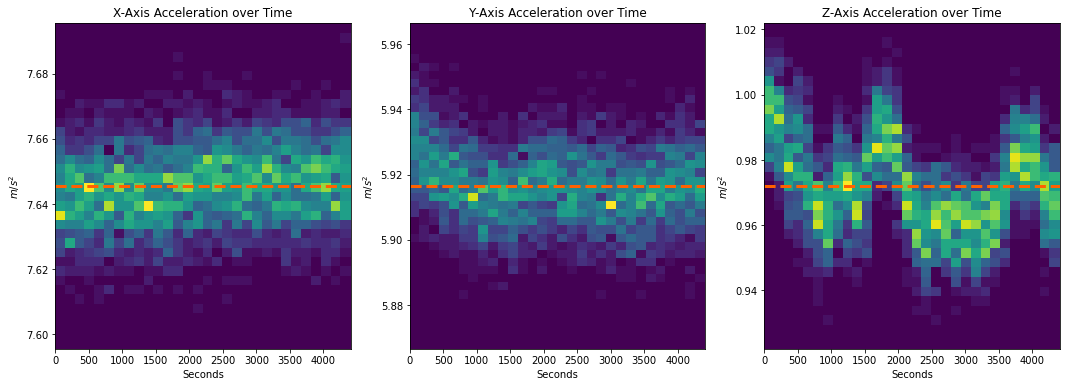

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), tight_layout=False)
dy = 0.05

axs[0].set_title("X-Axis Acceleration over Time");
axs[0].grid(True);
axs[0].hist2d(data_x, data["ax"], bins=[30,30]);
axs[0].hlines(mean_acc[0], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[0].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[0].set_ylim(mean_acc[0]-dy, mean_acc[0]+dy)
axs[0].set_facecolor("#440154")

axs[1].set_title("Y-Axis Acceleration over Time");
axs[1].grid(True);
axs[1].hist2d(data_x, data["ay"], bins=[30,30]);
axs[1].hlines(mean_acc[1], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[1].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[1].set_ylim(mean_acc[1]-dy, mean_acc[1]+dy)
axs[1].set_facecolor("#440154")

axs[2].set_title("Z-Axis Acceleration over Time");
axs[2].grid(True);
axs[2].hist2d(data_x, data["az"], bins=[30,30]);
axs[2].hlines(mean_acc[2], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[2].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[2].set_ylim(mean_acc[2]-dy, mean_acc[2]+dy);
axs[2].set_facecolor("#440154");

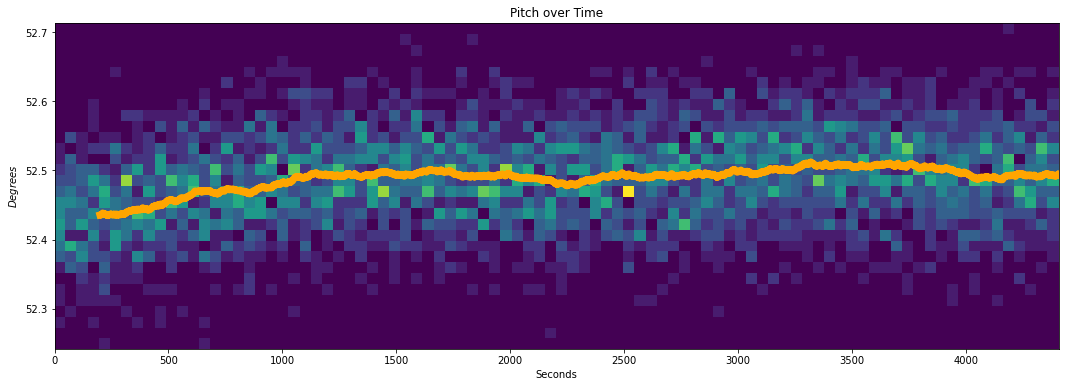

In [12]:
pitch = np.arctan2( np.sqrt(np.square(data["ax"]) + np.square(data["az"])), data["ay"]) * 180/np.pi;
num_avg = 200

fig, axs = plt.subplots(1, 1, figsize=(18, 6), tight_layout=False)
axs.set_title("Pitch over Time");
axs.grid(True);

axs.hist2d(data_x, pitch, bins=[90,30]);
axs.plot(data_x[num_avg-1:], np.convolve(pitch, np.ones(num_avg), 'valid') / num_avg, linewidth=7, linestyle='-', color='orange');
#axs.plot(data_x[num_avg-1:], np.convolve(data["pitch"], np.ones(num_avg), 'valid') / num_avg, linewidth=2, linestyle='-');

axs.set(ylabel='$Degrees$', xlabel='Seconds');

# Angle Sensor

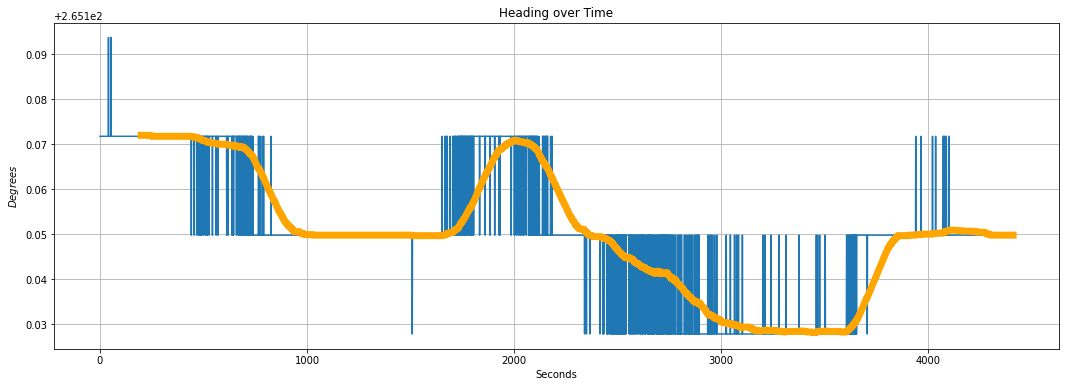

In [27]:
num_avg = 200

fig, axs = plt.subplots(1, 1, figsize=(18, 6), tight_layout=False)
axs.set_title("Heading over Time");
axs.grid(True);

axs.plot(data_x, data["heading"]);
axs.plot(data_x[num_avg-1:], np.convolve(data["heading"], np.ones(num_avg), 'valid') / num_avg, linewidth=7, linestyle='-', color='orange');
axs.set(ylabel='$Degrees$', xlabel='Seconds');